In [1]:
import numpy as np
from ase import Atoms
import ase.visualize
from ase.units import Bohr
from pyscf import gto, scf, mp, cc, dft
import glob
from matplotlib import pyplot as plt

import pandas as pd
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
from parse_density_files import CUBE
import alchemy_tools2 as at
import explore_qml_data as eqd


### Angles - butanol CCO

In [92]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/butanol/ang*/results.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

e_el = []
for d in data:
    e_el.append(d['e_el'])
e_el = np.array(e_el)

e_tot = []
for d in data:
    e_tot.append(d['e_tot'])
e_tot = np.array(e_tot)

In [29]:
geometries = dict()
for d in data:
    nuc_charges = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]*Bohr
    pos = eqd.shift2center(pos, [0,0,0])
    molecule = Atoms(numbers=nuc_charges, positions=pos)
    ang = np.round(molecule.get_angle(1,2,4))
    geometries[f'ang_{ang}'] = molecule

In [73]:
geometries.keys()

dict_keys(['ang_58.0', 'ang_70.0', 'ang_83.0', 'ang_95.0', 'ang_108.0', 'ang_120.0', 'ang_133.0', 'ang_145.0', 'ang_158.0'])

In [81]:
# ang = 70.0
# molcp = geometries[f'ang_{ang}'].copy()
# molcp.numbers[3] = 9
# ase.visualize.view(molcp, viewer='x3d')

Text(0, 0.5, '$E$ (Ha)')

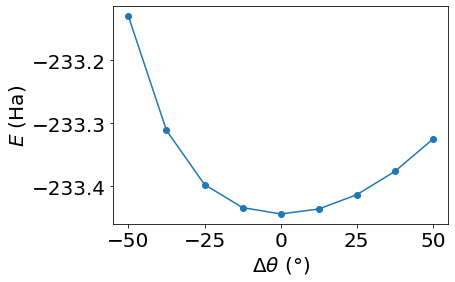

In [87]:
plt.rcParams['font.size'] = 20
plt.plot(angle, e_npbc, '-o')
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E$ (Ha)')

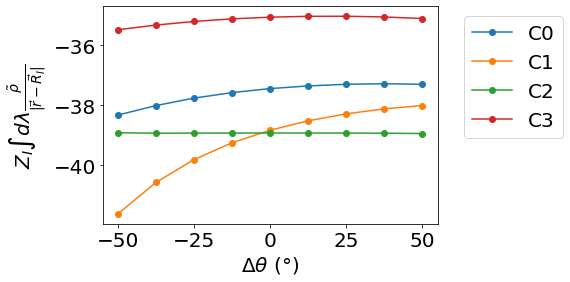

In [91]:
plt.plot(angle, e_el[:,0], '-o',label='C0')
plt.plot(angle, e_el[:,1], '-o',label='C1')
plt.plot(angle, e_el[:,2], '-o',label='C2')
plt.plot(angle, e_el[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
#plt.ylabel(r'$E_{\rm{el}}$ (Ha)')

plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|}$')

plt.legend(bbox_to_anchor=(1.05,1))

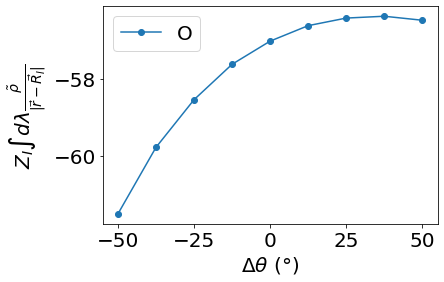

In [104]:
plt.plot(angle, e_el[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|}$')
plt.legend()

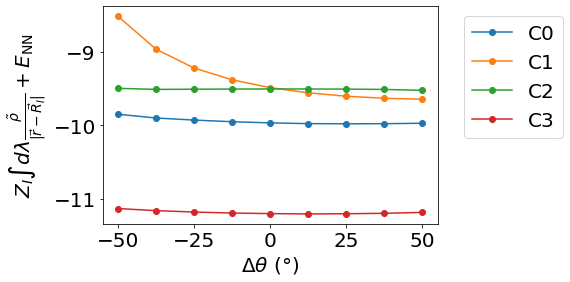

In [94]:
plt.plot(angle, e_tot[:,0], '-o',label='C0')
plt.plot(angle, e_tot[:,1], '-o',label='C1')
plt.plot(angle, e_tot[:,2], '-o',label='C2')
plt.plot(angle, e_tot[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|} + E_{\rm{NN}}$')

plt.legend(bbox_to_anchor=(1.05,1))

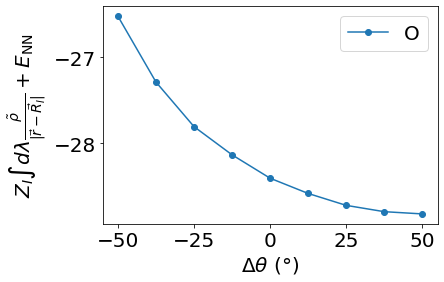

In [107]:
plt.plot(angle, e_tot[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|} + E_{\rm{NN}}$')
plt.legend()

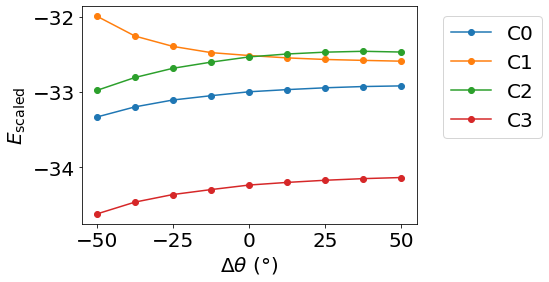

In [100]:
plt.plot(angle, e_scaled[:,0], '-o',label='C0')
plt.plot(angle, e_scaled[:,1], '-o',label='C1')
plt.plot(angle, e_scaled[:,2], '-o',label='C2')
plt.plot(angle, e_scaled[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E_{\rm{scaled}}$')

plt.legend(bbox_to_anchor=(1.05,1))

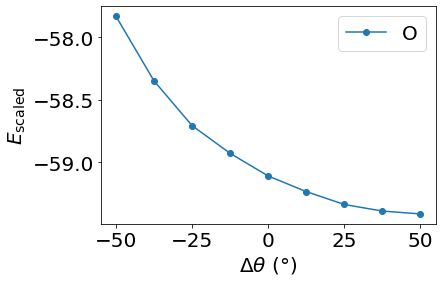

In [106]:
plt.plot(angle, e_scaled[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E_{\rm{scaled}}$')
plt.legend()

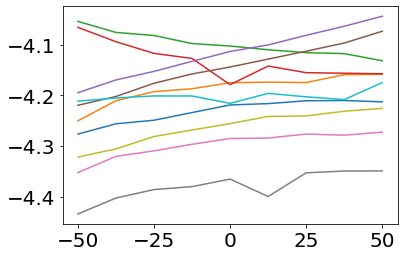

In [98]:
plt.plot(angle, e_scaled[:,5:])

# CO-bond butanol

In [2]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/bond_stretch/butanol/dist*/results.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

e_el = []
for d in data:
    e_el.append(d['e_el'])
e_el = np.array(e_el)

e_tot = []
for d in data:
    e_tot.append(d['e_tot'])
e_tot = np.array(e_tot)

In [24]:
geometries = dict()
for d in data:
    nuc_charges = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]*Bohr
    pos = eqd.shift2center(pos, [0,0,0])
    molecule = Atoms(numbers=nuc_charges, positions=pos)
    ang = np.round(molecule.get_distance(2,4), 3)
    geometries[f'ang_{ang}'] = molecule

Text(0, 0.5, '$E$ (Ha)')

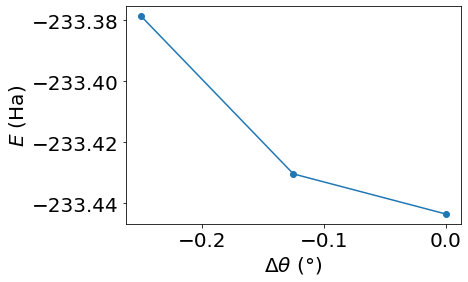

In [26]:
plt.rcParams['font.size'] = 20
plt.plot(angle, e_npbc, '-o')
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E$ (Ha)')

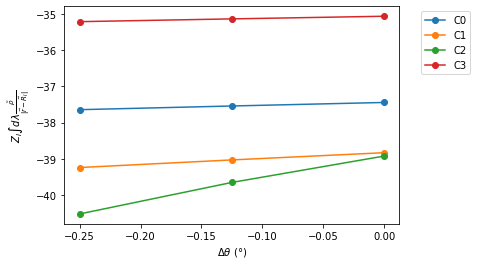

In [25]:
plt.plot(angle, e_el[:,0], '-o',label='C0')
plt.plot(angle, e_el[:,1], '-o',label='C1')
plt.plot(angle, e_el[:,2], '-o',label='C2')
plt.plot(angle, e_el[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
#plt.ylabel(r'$E_{\rm{el}}$ (Ha)')

plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|}$')

plt.legend(bbox_to_anchor=(1.05,1))

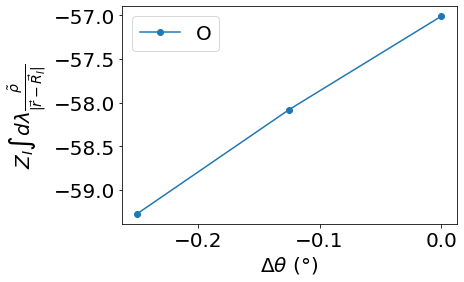

In [27]:
plt.plot(angle, e_el[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|}$')
plt.legend()

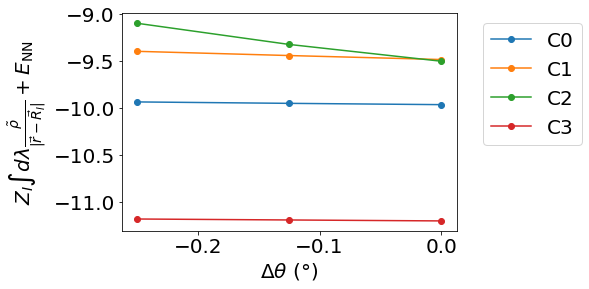

In [28]:
plt.plot(angle, e_tot[:,0], '-o',label='C0')
plt.plot(angle, e_tot[:,1], '-o',label='C1')
plt.plot(angle, e_tot[:,2], '-o',label='C2')
plt.plot(angle, e_tot[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|} + E_{\rm{NN}}$')

plt.legend(bbox_to_anchor=(1.05,1))

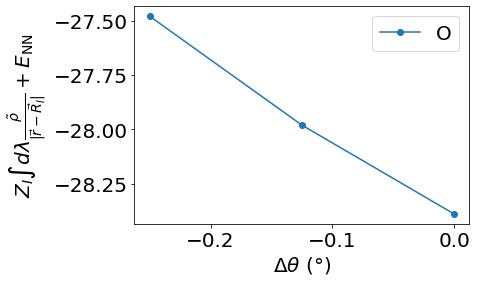

In [29]:
plt.plot(angle, e_tot[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$Z_I \int d\lambda \frac{\tilde{\rho}}{|\vec{r}-\vec{R}_I|} + E_{\rm{NN}}$')
plt.legend()

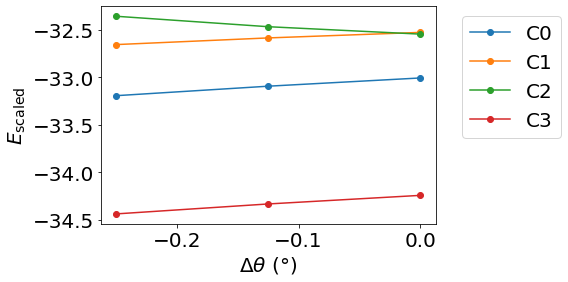

In [30]:
plt.plot(angle, e_scaled[:,0], '-o',label='C0')
plt.plot(angle, e_scaled[:,1], '-o',label='C1')
plt.plot(angle, e_scaled[:,2], '-o',label='C2')
plt.plot(angle, e_scaled[:,3], '-o',label='C3')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E_{\rm{scaled}}$')

plt.legend(bbox_to_anchor=(1.05,1))

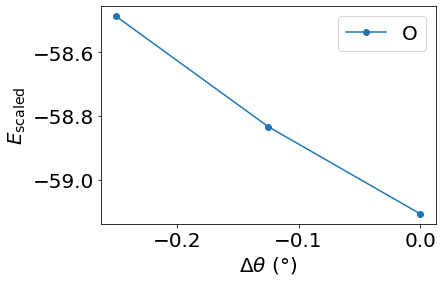

In [31]:
plt.plot(angle, e_scaled[:,4], '-o',label='O')
plt.legend()
plt.xlabel(r'$\Delta\theta$ (°)')
plt.ylabel(r'$E_{\rm{scaled}}$')
plt.legend()

### Angles - methane HCH

In [41]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/methane_HCH/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

In [66]:
for d in data:
    Z = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]
    molecule = ase.Atoms(Z, pos)
    #print(molecule.get_angle(1,4,0))
    print(molecule.get_angle(1,4,2))
    #print(molecule.get_angle(1,4,3))

111.43453127963967
110.4638870425152
109.47346672236779
108.46450173698067
107.43828147217903


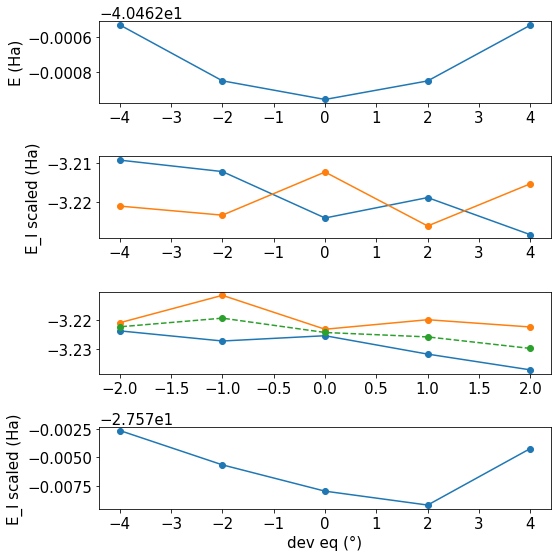

In [67]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(4)
ax[0].plot(angle,e_npbc, '-o', label='npbc')
ax[0].set_ylabel('E (Ha)')

ax[1].plot(angle, e_scaled[:,0], '-o')
ax[1].plot(angle, e_scaled[:,1], '-o')
#ax[1].plot(angle, (e_scaled[:,0]+e_scaled[:,1])/2, '--o')

#ax[1].plot(angle, e_scaled[:,2], '-o')
#ax[1].plot(angle, e_scaled[:,3], '-o')
ax[1].set_ylabel('E_I scaled (Ha)')
angle2 = np.linspace(2,-2,5)
ax[2].plot(angle2, e_scaled[:,2], '-o')
ax[2].plot(angle2, e_scaled[:,3], '-o')
ax[2].plot(angle2, (e_scaled[:,2]+e_scaled[:,3])/2, '--o')

ax[3].plot(angle, e_scaled[:,4], '-o')
ax[3].set_ylabel('E_I scaled (Ha)')
ax[3].set_xlabel('dev eq (°)')


fig.tight_layout()

### Angles - ethene HCH

In [36]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/ethene_HCH/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

In [78]:
for d in data:
    Z = d['nuclei'][:,0]
    pos = d['nuclei'][:,1:]
    molecule = ase.Atoms(Z, pos)
    print(molecule.get_angle(3,0,5))
    #print(molecule.get_angle(1,4,2))
    #print(molecule.get_angle(1,4,3))

151.55693556929694
149.55693651807073
147.55692744585545
145.55694976634265
143.55694915339626


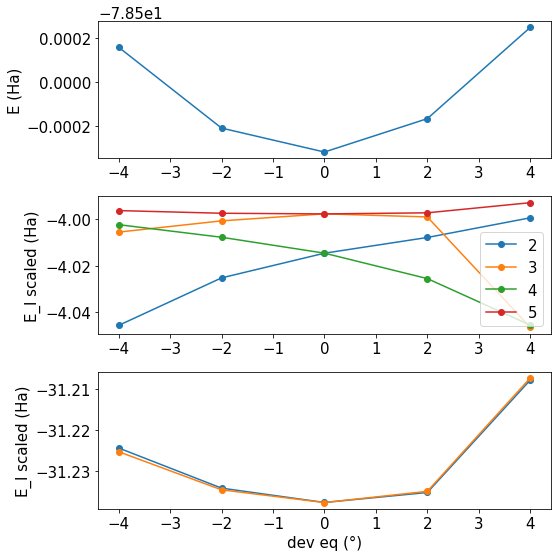

In [71]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(3)
ax[0].plot(angle,e_npbc, '-o', label='npbc')
ax[0].set_ylabel('E (Ha)')

ax[1].plot(angle, e_scaled[:,2], '-o', label='2')
ax[1].plot(angle, e_scaled[:,3], '-o', label='3')
ax[1].plot(angle, e_scaled[:,4], '-o', label='4')
ax[1].plot(angle, e_scaled[:,5], '-o', label='5')
ax[1].set_ylabel('E_I scaled (Ha)')
ax[1].legend()

ax[2].plot(angle, e_scaled[:,0], '-o')
ax[2].plot(angle, e_scaled[:,1], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')
ax[2].set_xlabel('dev eq (°)')


fig.tight_layout()

### Angles - water

In [27]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/angles/water/ang*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

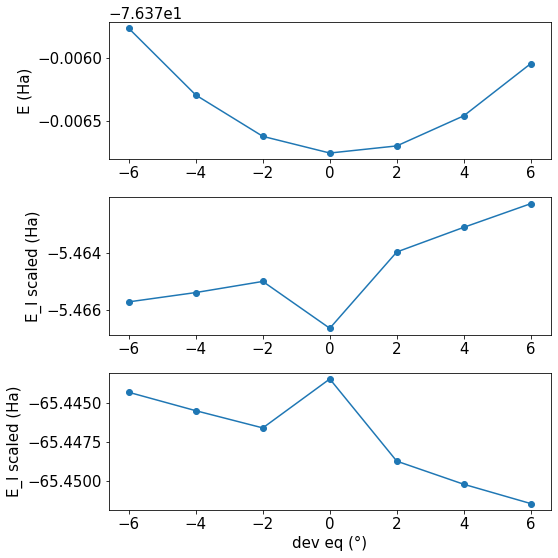

In [28]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(3)
ax[0].plot(angle, e_npbc, '-o')
ax[0].set_ylabel('E (Ha)')
#plt.plot(angle,e_npbc, '-o', label='npbc')
ax[1].plot(angle, (e_scaled[:,0]+e_scaled[:,1])/2, '-o')
ax[1].set_ylabel('E_I scaled (Ha)')
ax[2].plot(angle, e_scaled[:,2], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')
ax[2].set_xlabel('dev eq (°)')
fig.tight_layout()

### Dihedrals - ethane

In [29]:
paths_glob = glob.glob('/home/misa/projects/atomic-energies/data/ueg_reference/amons/geometry/dihedrals/ethane/dihe*/results2.dict')
angle = []
for p in paths_glob:
    angle.append(float(p.split('/')[-2].split('_')[-1]))
paths = []
for p,a in zip(paths_glob,angle):
    paths.append((a,p))
paths.sort()
angle.sort()
data = []
for p in paths:
    data.append(uqm.load_obj(p[1]))

e_npbc = []
for d in data:
    e_npbc.append(d['e_nbpc'])
    
e_scaled = []
for d in data:
    e_scaled.append(d['e_scaled'])
e_scaled = np.array(e_scaled)

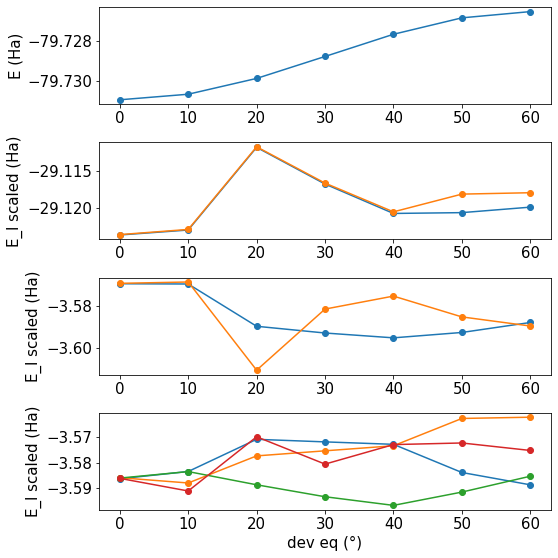

In [58]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(4)
ax[0].plot(angle, e_npbc, '-o')
ax[0].set_ylabel('E (Ha)')

#plt.plot(angle,e_npbc, '-o', label='npbc')
ax[1].plot(angle, e_scaled[:,0], '-o')
ax[1].plot(angle, e_scaled[:,1], '-o')

ax[1].set_ylabel('E_I scaled (Ha)')

ax[2].plot(angle, e_scaled[:,2], '-o')
ax[2].plot(angle, e_scaled[:,7], '-o')
ax[2].set_ylabel('E_I scaled (Ha)')

ax[3].plot(angle, e_scaled[:,3], '-o')
ax[3].plot(angle, e_scaled[:,4], '-o')
ax[3].plot(angle, e_scaled[:,5], '-o')
ax[3].plot(angle, e_scaled[:,6], '-o')
ax[3].set_ylabel('E_I scaled (Ha)')
ax[3].set_xlabel('dev eq (°)')

fig.tight_layout()